In [18]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [19]:
#just in case, install the kaggle environment
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 25.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#!pip uninstall scipy numpy -y


In [20]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 17.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.4
    Uninstalling numpy-2.3.4:
      Successfully uninstalled numpy-2.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requ

In [23]:
#install duck duck go search
!pip install ddgs
from ddgs import DDGS  
from fastcore.all import *
#define function which returns duck duck go search
def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [49]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('apples fruit photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/588587/pexels-photo-588587.jpeg?cs=srgb&dl=food-apple-trees-588587.jpg&fm=jpg'

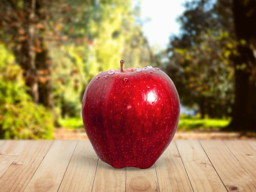

In [50]:
from fastdownload import download_url
dest = 'apple.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

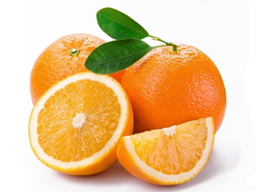

In [51]:
#same for oranges
download_url(search_images('oranges fruit photos', max_images=1)[0], 'orange.jpg', show_progress=False)
Image.open('orange.jpg').to_thumb(256,256)

In [80]:
# Define clean labels AND detailed search phrases
label_search_pairs = {
    'apple': 'apples fruit photos',
    'orange': 'oranges fruit photos'
}

path = Path('apple_or_orange_dataset')

# Loop through the clean labels (folder names) and their search phrases
for label, search_phrase in label_search_pairs.items():
# Use the clean 'label' for the destination folder name
    dest = (path/label) 
    dest.mkdir(exist_ok=True, parents=True)
    
    print(f"Searching for: {search_phrase} | Saving to folder: {label}")
    
# Use the detailed search_phrase for the image search
    download_images(dest, urls=search_images(f'{search_phrase}'))
    time.sleep(5)
    resize_images(dest, max_size=400, dest=dest)

Searching for: apples fruit photos | Saving to folder: apple


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for: oranges fruit photos | Saving to folder: orange


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [81]:
#Some photos might not download correctly which could cause our model training to fail, so we'll remove them
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

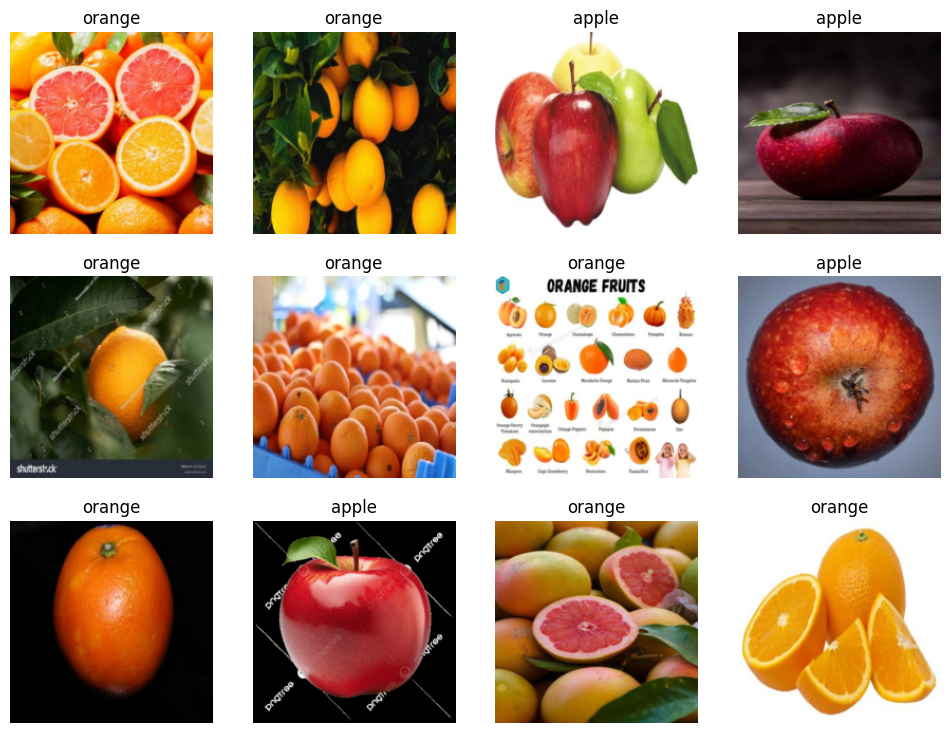

In [82]:
#to train a model, we'll need DataLoaders, which is an object that contains a training and a validation sets
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [83]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.743840,0.103592,0.026667,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.189136,0.068849,0.026667,00:01
1,0.142834,0.064275,0.013333,00:01
2,0.095232,0.065786,0.013333,00:01


In [ ]:
'''"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset 
(called the pretrained model), 
and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in imagenet, 
and widely-used computer vision dataset with images covering 1000 categories)'''

In [84]:
#let's see how model sees cats
is_apple,_,probs = learn.predict(PILImage.create('apple.jpg'))
print(f"This is a: {is_apple}.")
print(f"Probability it is an apple: {probs[0]:.4f}")

This is a: apple.
Probability it is an apple: 1.0000
